타이틀 한글패치


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기


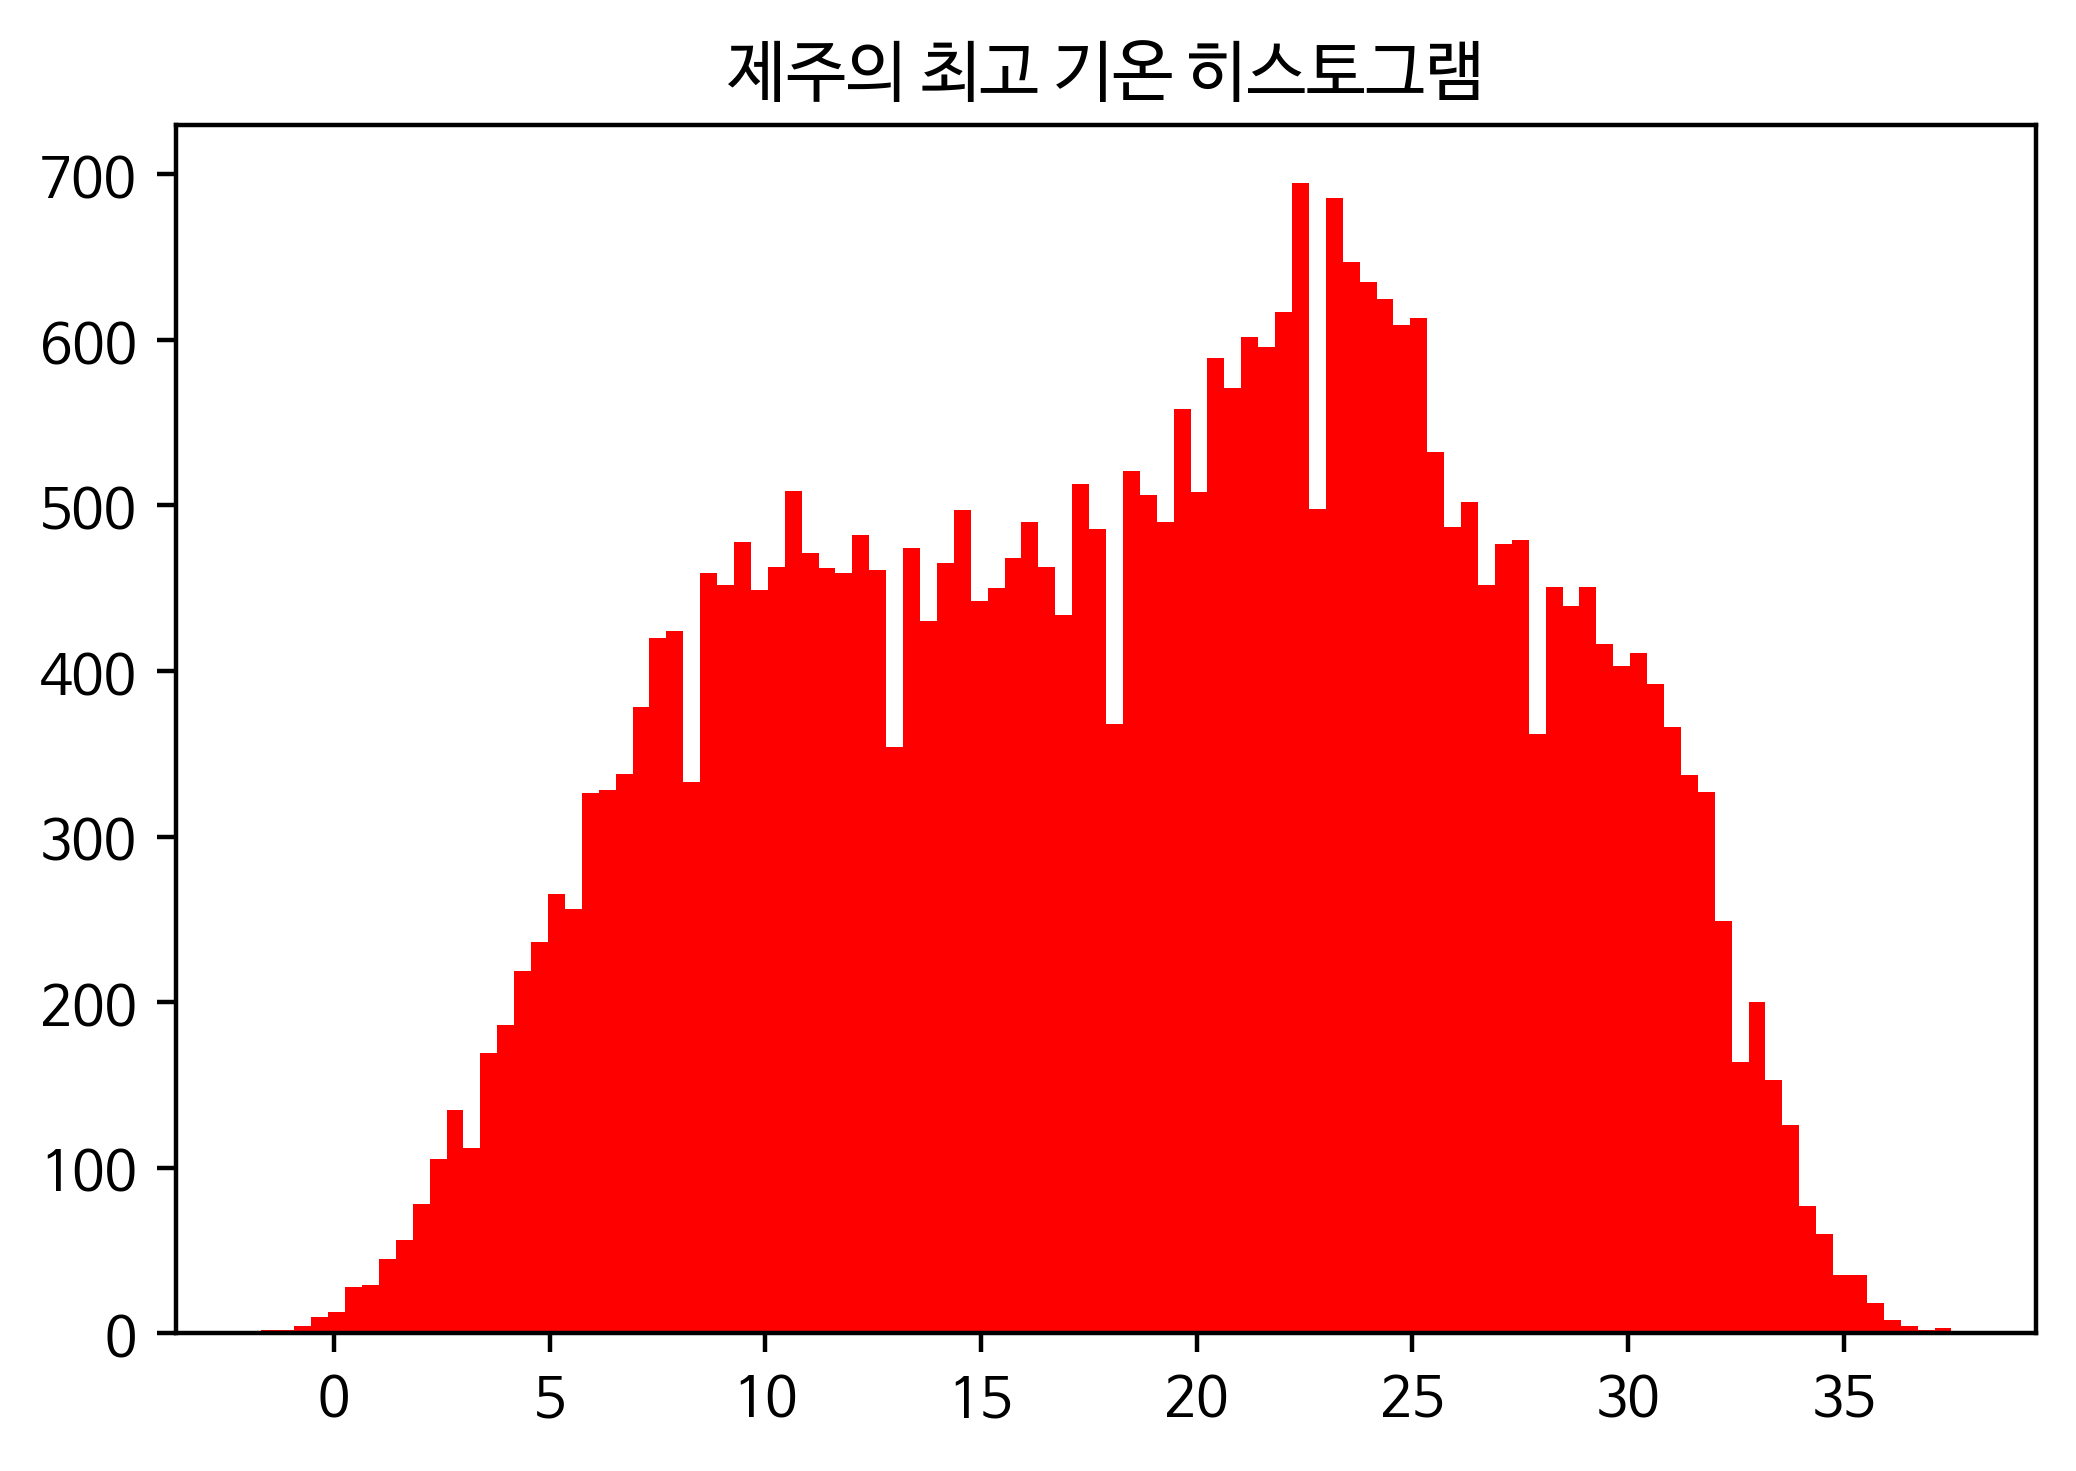

In [28]:
import csv
import matplotlib.pyplot as plt

f= open('/content/jeju-temp.csv', encoding='cp949')
data = csv.reader(f)
next(data) #헤더

result = [] #최고 기온 데이터를 저장할 리스트 생성

for row in data:
  if row[-1] != '': # 최고 기온 데이터 값이 결측치가 아니라면
    result.append(float(row[-1]))

#최고기온 데이터 히스토그램
plt.figure(dpi = 200)
plt.hist(result,bins=100,color='r')
plt.title('제주의 최고 기온 히스토그램')
plt.show()

최저기온 히스토그램

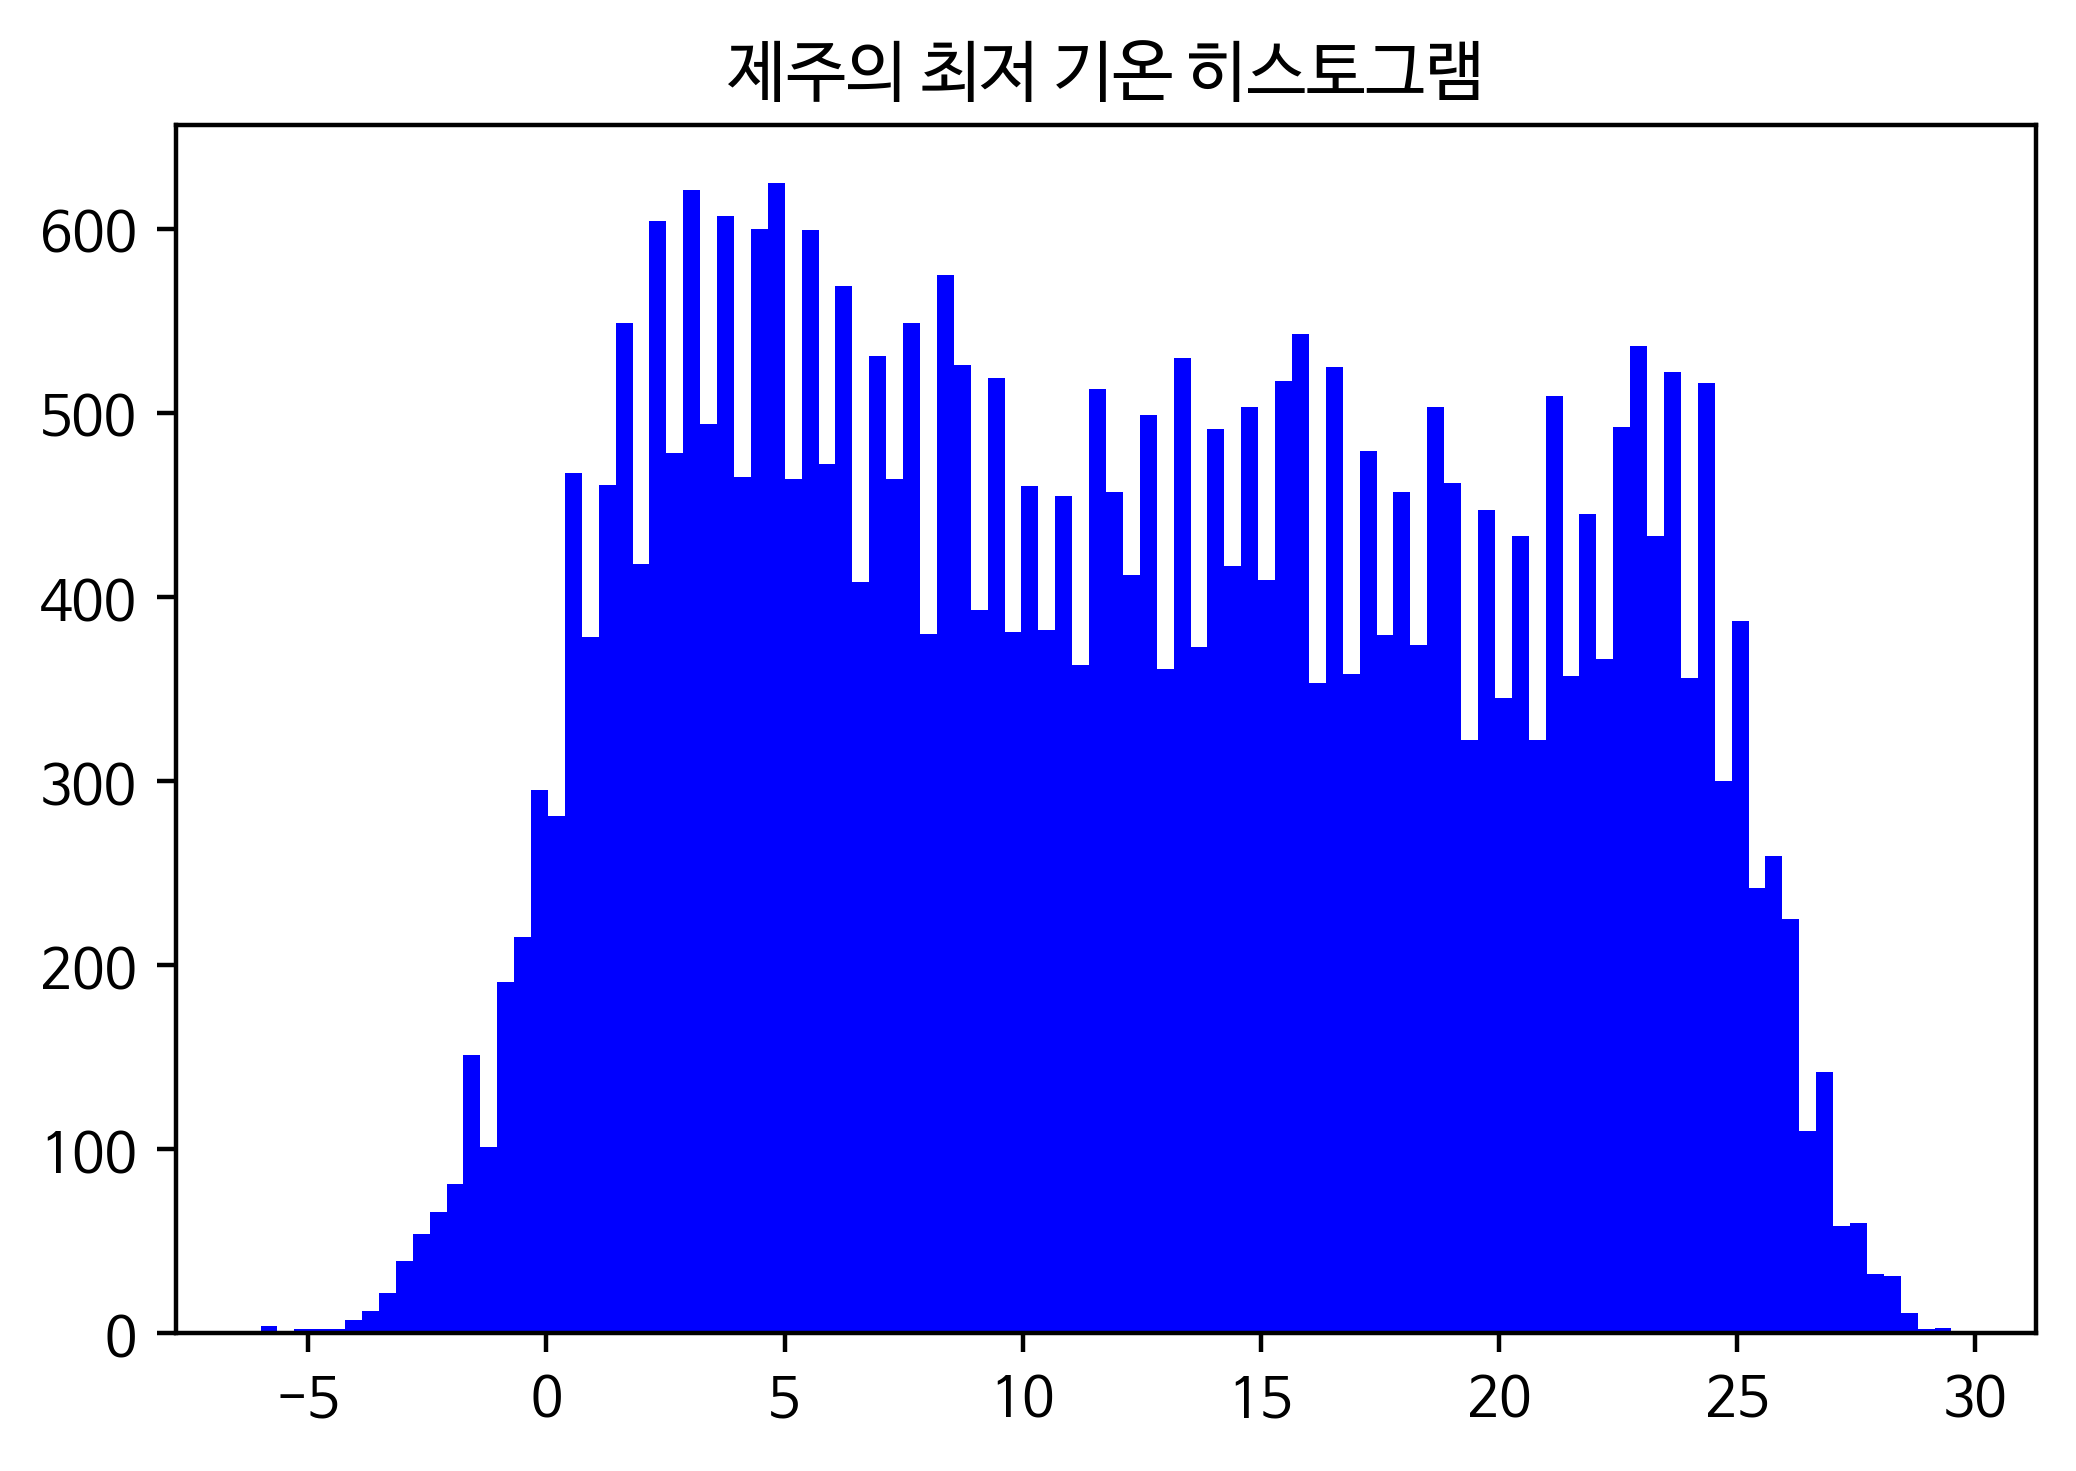

In [27]:
import csv
import matplotlib.pyplot as plt

f= open('/content/jeju-temp.csv', encoding='cp949')
data = csv.reader(f)
next(data) #헤더

result = [] #최저 기온 데이터를 저장할 리스트 생성

for row in data:
  if row[-2] != '': # 최저 기온 데이터 값이 결측치가 아니라면
    result.append(float(row[-2]))

#최저기온 데이터 히스토그램
plt.figure(dpi = 200)
plt.hist(result,bins=100,color='b')
plt.title('제주의 최저 기온 히스토그램')
plt.show()

평균기온 히스토그램

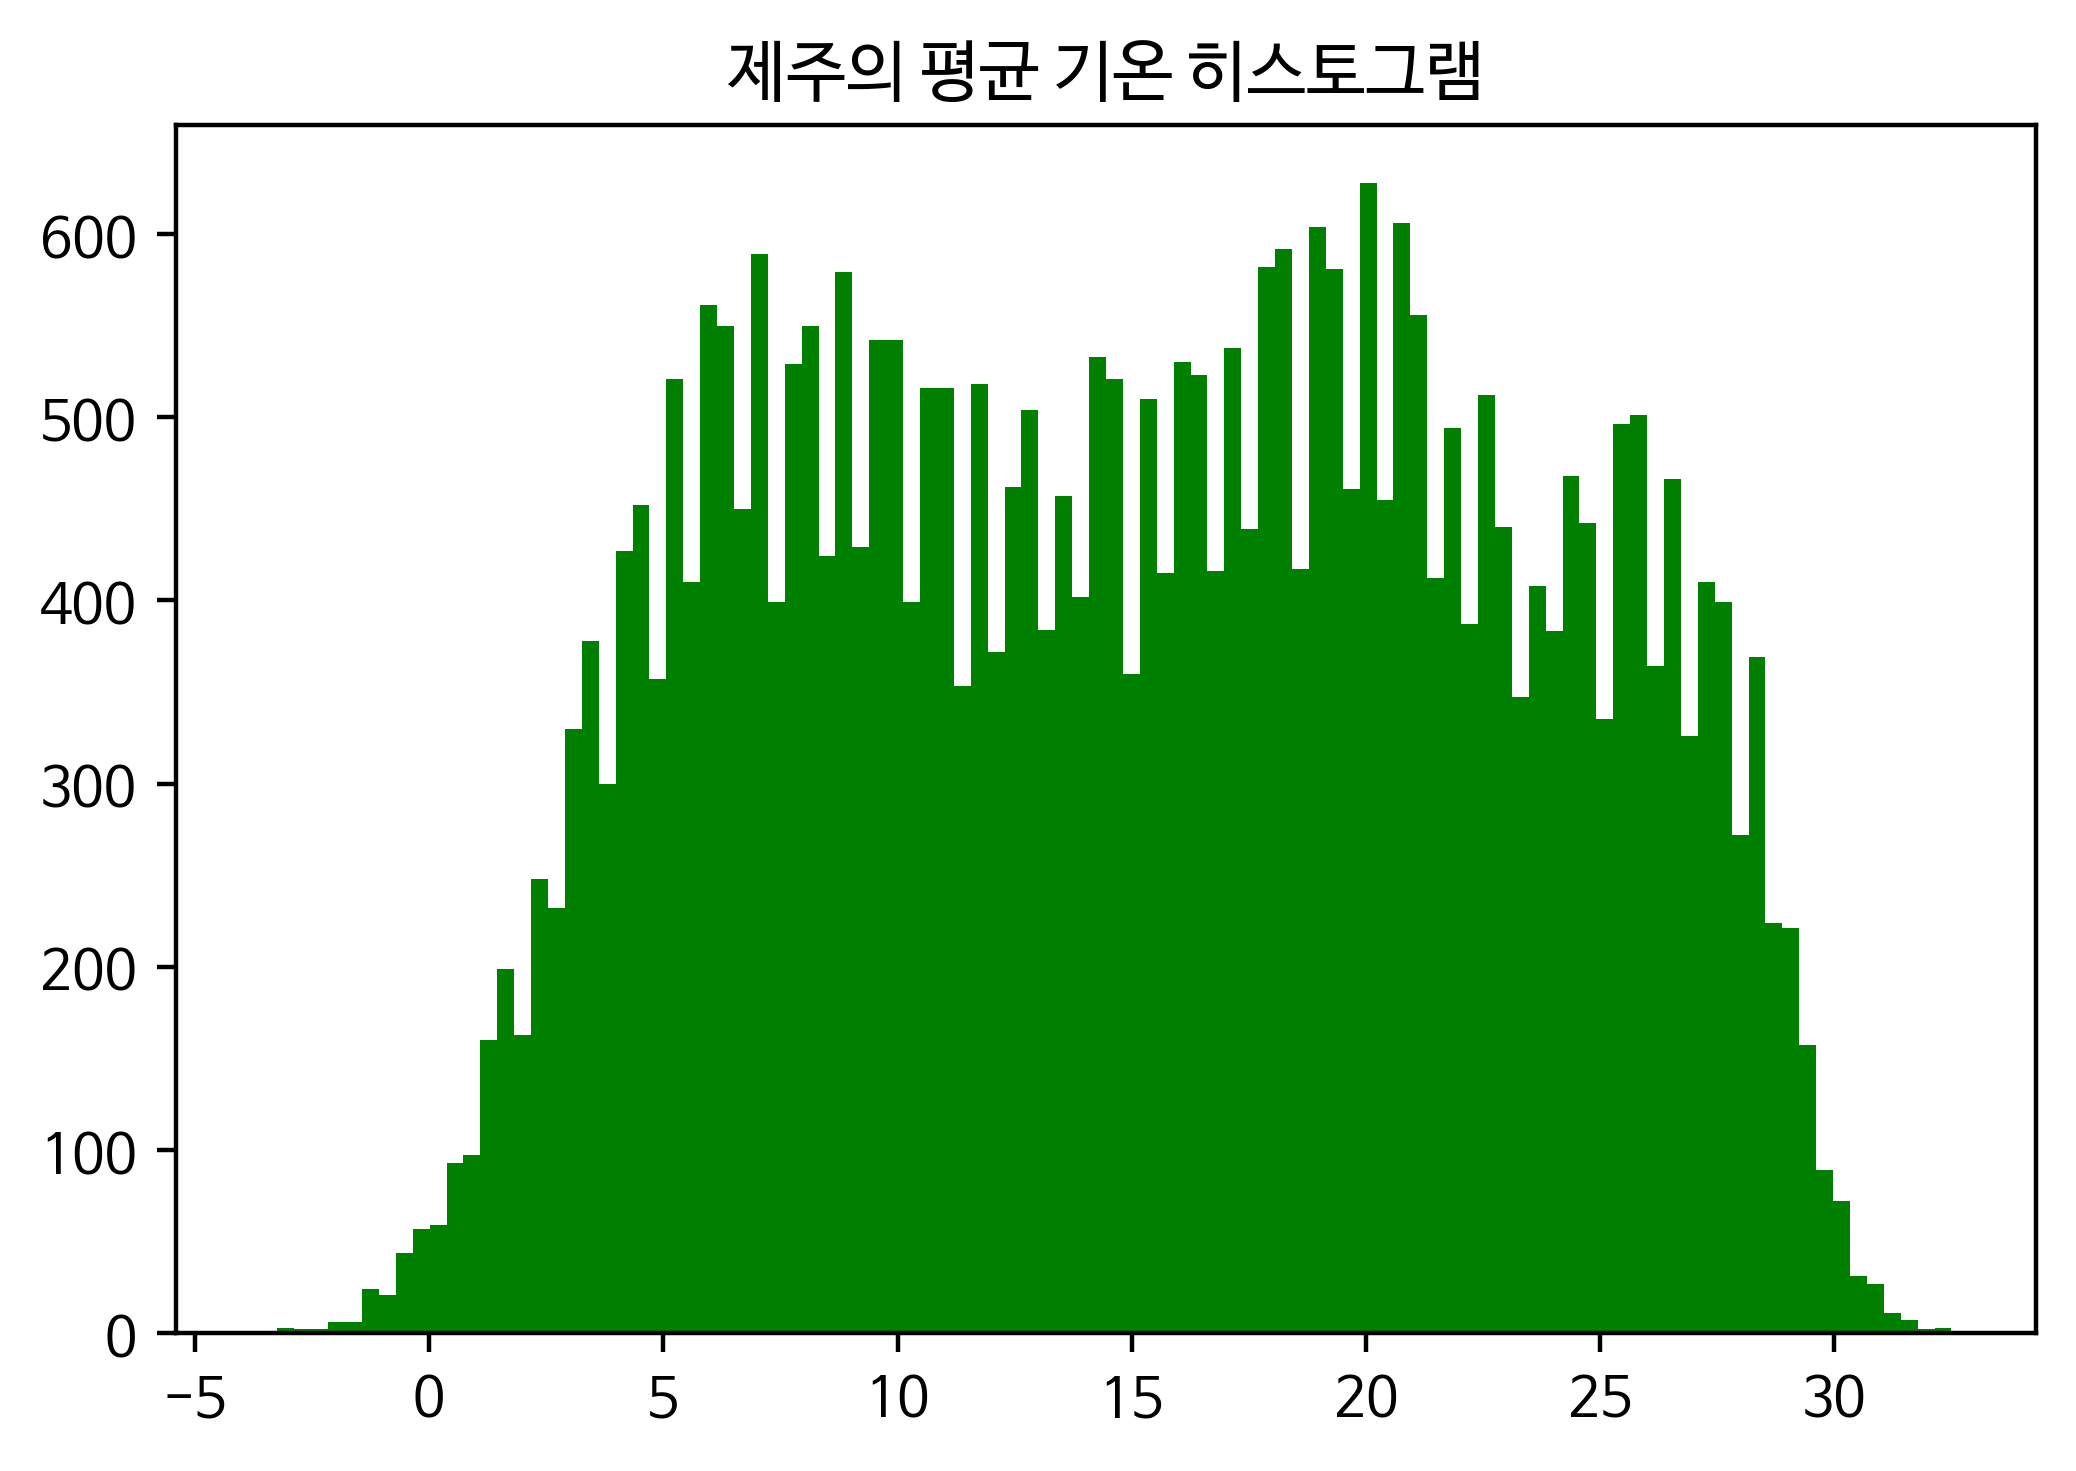

In [12]:
import csv
import matplotlib.pyplot as plt

f= open('/content/jeju-temp.csv', encoding='cp949')
data = csv.reader(f)
next(data) #헤더

result = [] #평균 기온 데이터를 저장할 리스트 생성

for row in data:
  if row[-3] != '': # 평균 기온 데이터 값이 결측치가 아니라면
    result.append(float(row[-3]))

#평균기온 데이터 히스토그램
plt.figure(dpi = 200)
plt.hist(result,bins=100,color='g')
plt.title('제주의 평균 기온 히스토그램')
plt.show()

2) 상자그림을 활용한 최고 기온 vs 서울 최고 기온


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


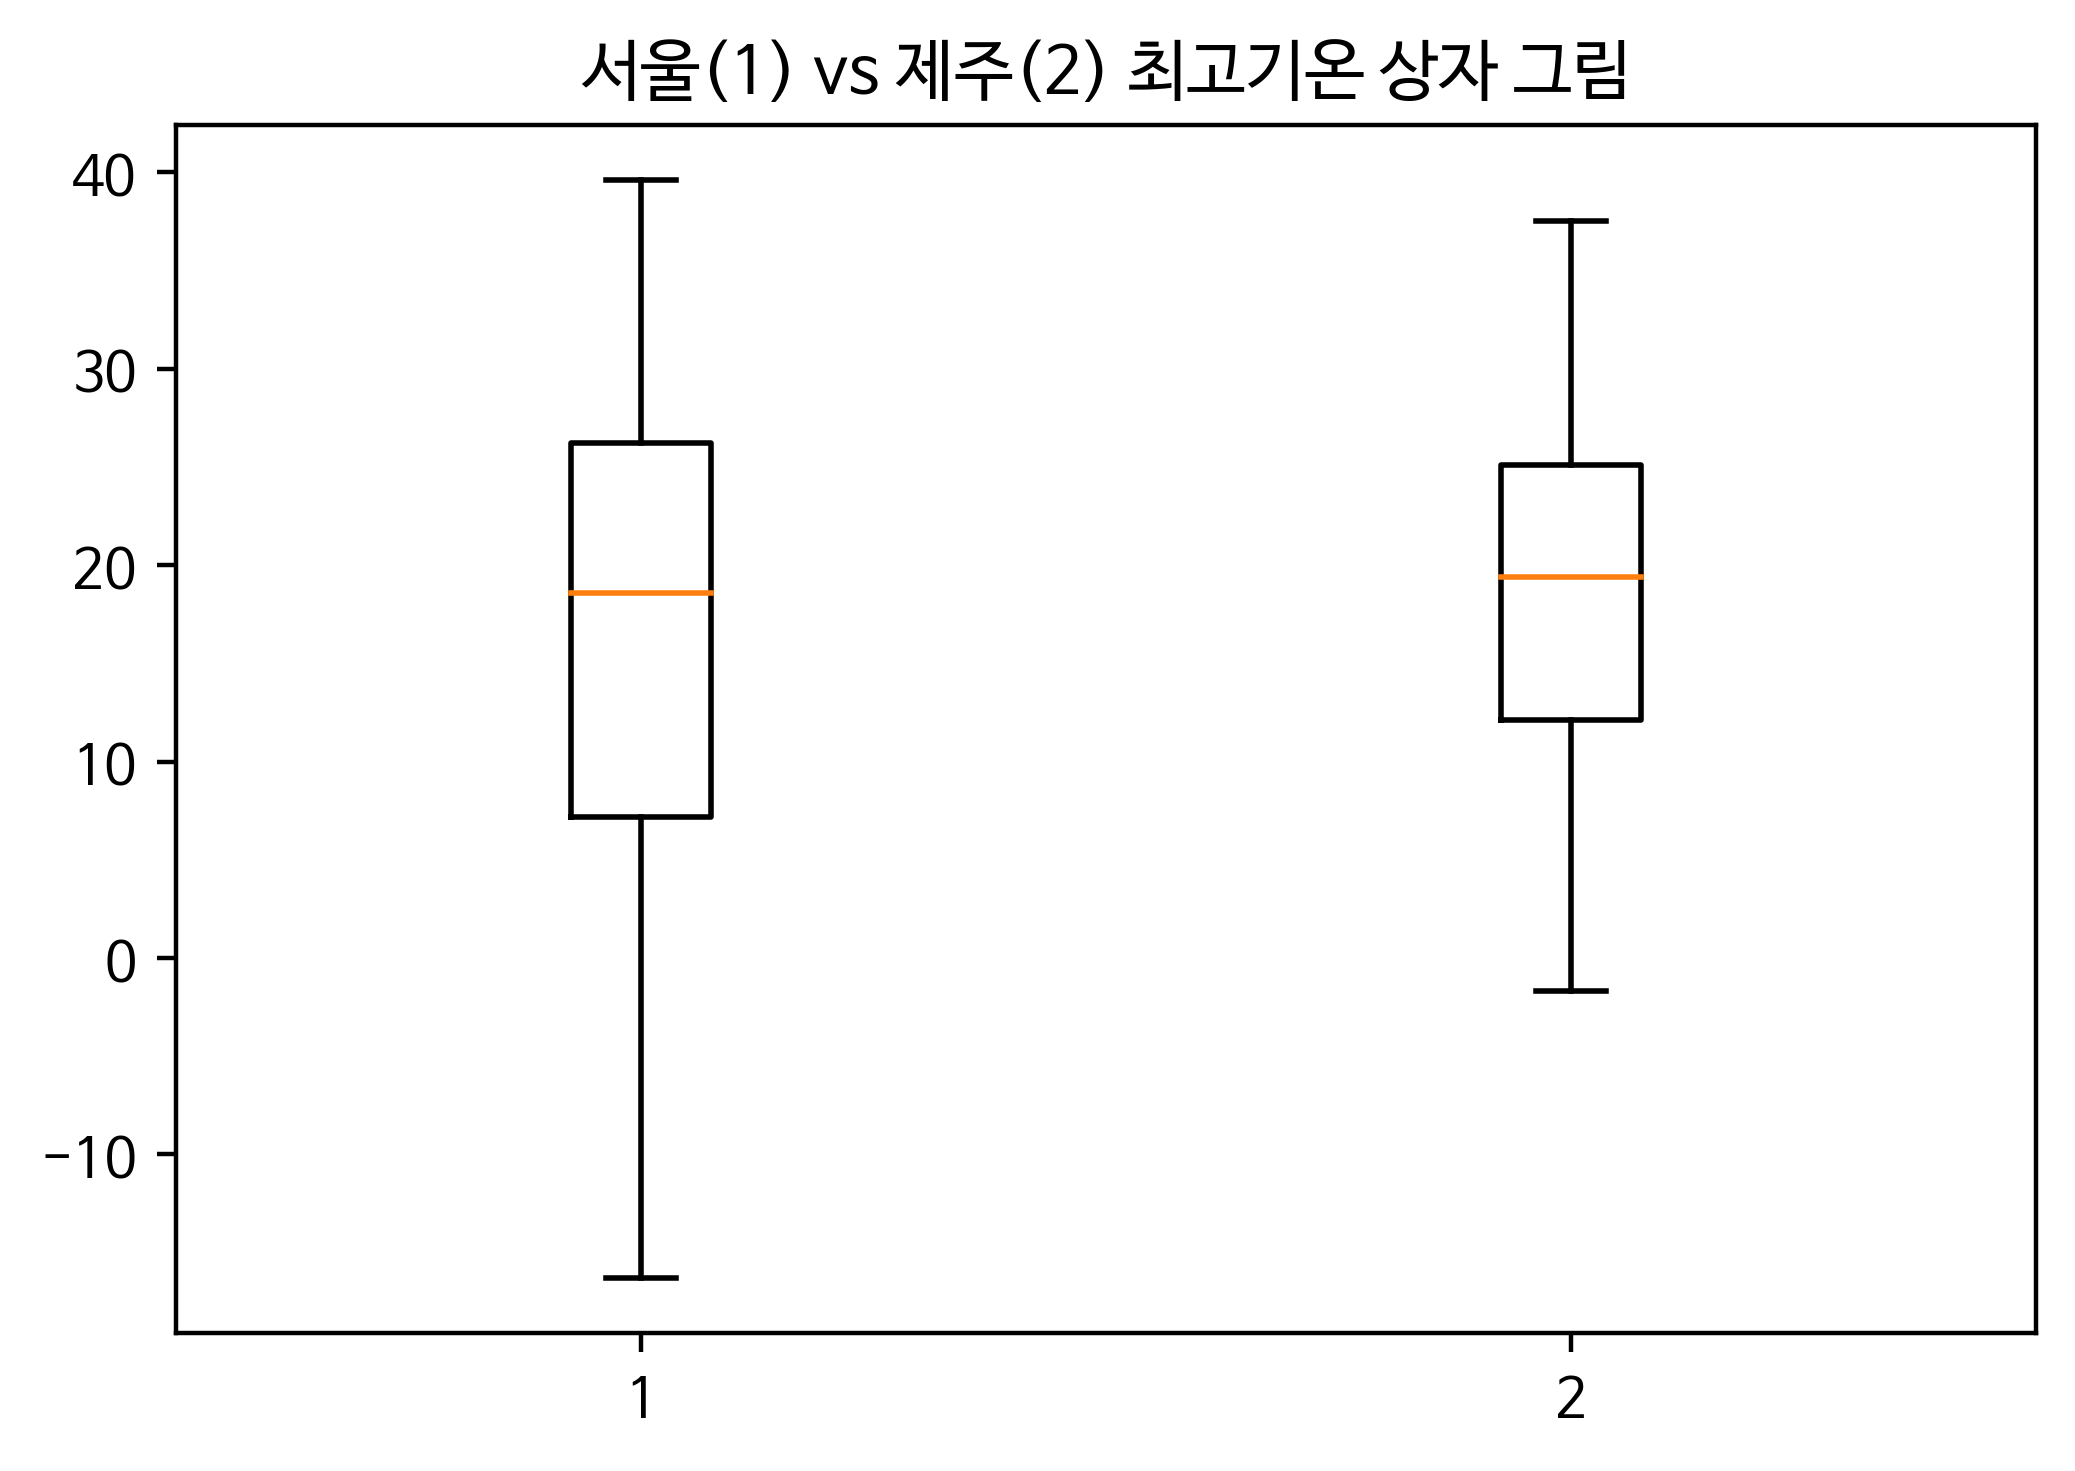

In [23]:
import csv
import matplotlib.pyplot as plt

f= open('seoul.csv', encoding='cp949')
z= open('/content/jeju-temp.csv', encoding='cp949')
seoul = csv.reader(f)
jeju = csv.reader(z)
next(seoul) #헤더
next(jeju) #헤더

seoulDB = [] #서울의 최고 기온을 담을 변수
jejuDB = [] #제주의 최고 기온을 담을 변수





for row in seoul:
  if row[-1] != '': # 서울최고 기온 데이터 값이 결측치가 아니라면
    seoulDB.append(float(row[-1]))

for row in jeju:
  if row[-1] != '': # 제주최고 기온 데이터 값이 결측치가 아니라면
    jejuDB.append(float(row[-1]))

    
#상자그림 출력
plt.figure(dpi=200)
plt.boxplot([seoulDB,jejuDB])
plt.title('서울(1) vs 제주(2) 최고기온 상자 그림')
plt.show()

3) 월별 최고기온 상자 그림 그리기


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


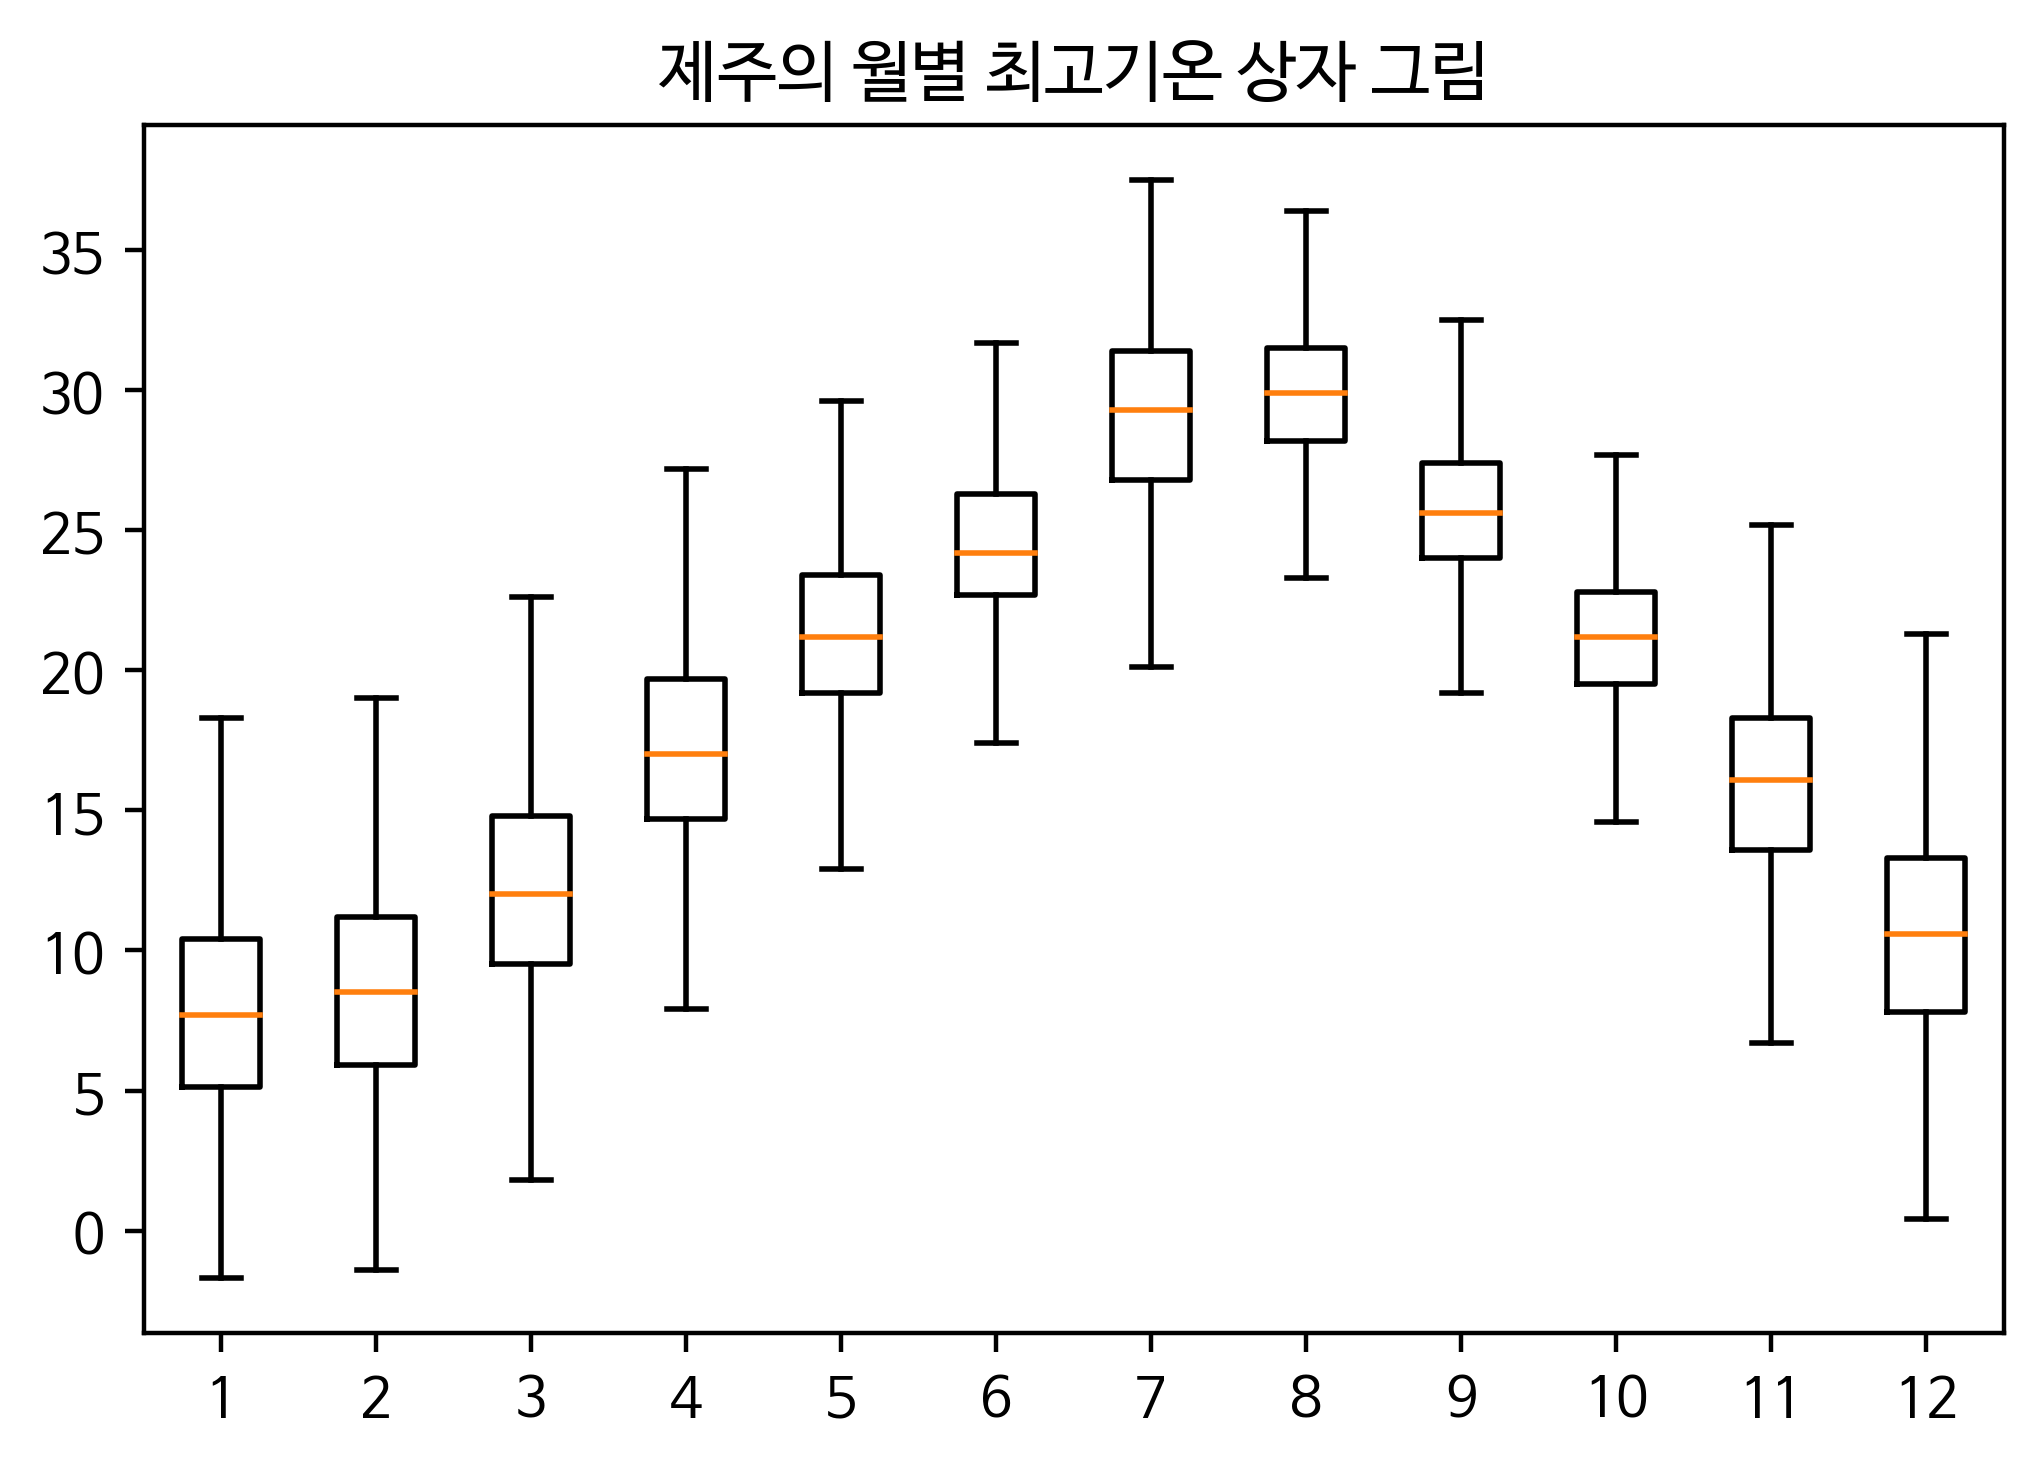

In [30]:
import csv
import matplotlib.pyplot as plt

f= open('/content/jeju-temp.csv', encoding='cp949')
data = csv.reader(f)
next(data) #헤더

month = [] #월별 데이터 저장할 변수

for i in range(12):
  month.append([]) #데이 리스트에 12개 리스트 생성

for row in data:
  if row[-1] != '':
    month[int(row[0].split('-')[1])-1].append(float(row[-1])) # 스플릿으로 row의 월만 추출 후 -1로 리스트에 삽입

plt.figure(dpi=200)

plt.boxplot(month,showfliers=False) #이상치 제거
plt.title('제주의 월별 최고기온 상자 그림')
plt.show()

4) 특정 달의 일별 최고 기온 상자 그림 그리기


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


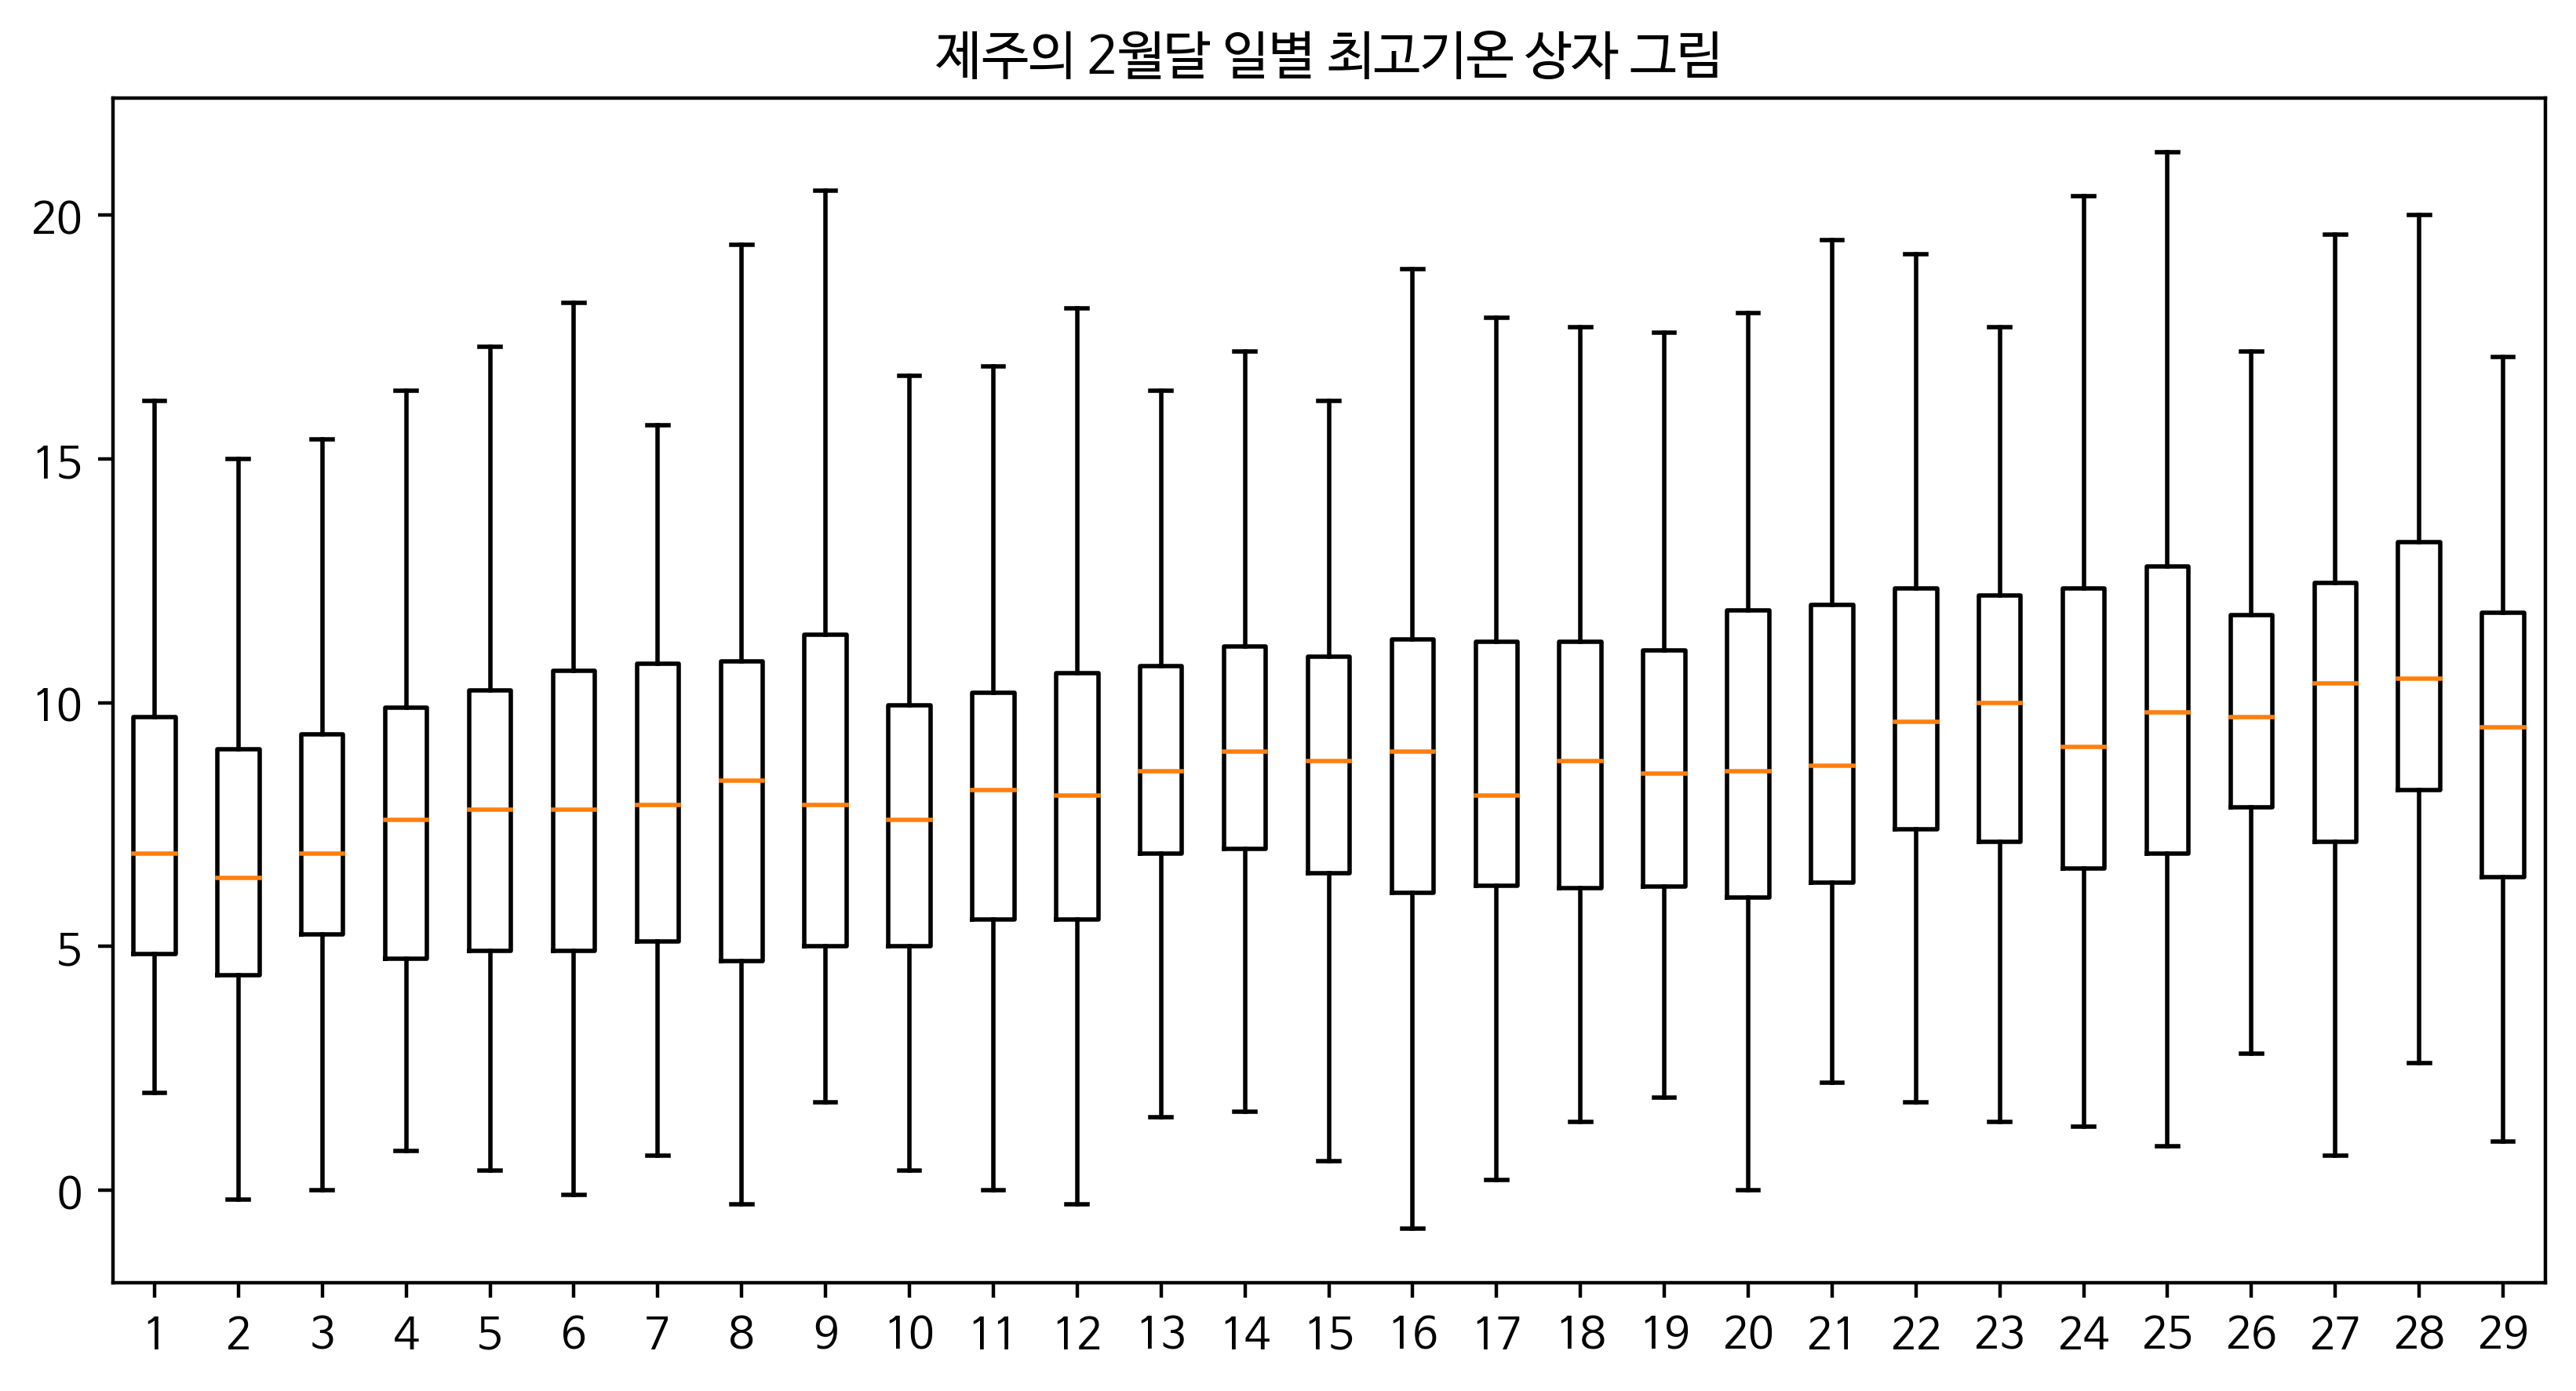

In [24]:
import csv
import matplotlib.pyplot as plt

f= open('/content/jeju-temp.csv', encoding='cp949')
data = csv.reader(f)
next(data) #헤더

day = []

for i in range(29):
  day.append([]) #데이 리스트에 29개 리스트 생성

for row in data:
  if row[-1] != '':
    if row[0].split('-')[1] == '02':
      day[int(row[0].split('-')[2])-1].append(float(row[-1]))  # 스플릿으로 row의 일짜만 추출 후 -1로 리스트에 삽입

plt.figure(figsize=(10,5),dpi=200)
plt.boxplot(day,showfliers=False)
plt.title('제주의 2월달 일별 최고기온 상자 그림')
plt.show()